<left>
    <img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/Logo_SYGNET.png" width="90" alt="cognitiveclass.ai logo">
</left>

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Tensorflow_logo.svg" width="200" alt="cognitiveclass.ai logo">
</center>




# A.I. Dataset Analysis 
## Part I - Exploratory Data Analysis (EDA)

Postprocessing the simulation results from ZSOIL for Neural Network training.

## Objectives

By conducting this thorough data analysis, we'll gain a deeper understanding of the dataset and the underlying physical processes. This will not only help in building a better NN model but also provide valuable insights into the soil subsidence phenomenon in our simulation. These insights can guide feature selection, inform model architecture decisions, and improve interpretability of the NN's results.

*   Data Science with Python
*   Statistics

<h3>Table of Contents</h3>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#I. Exploratory Data Analysis (EDA)"><b>I. Exploratory Data Analysis (EDA)</b></a></li>
        <li><a href="#- Descriptive Statistics">- Descriptive Statistics</a></li>
        <li><a href="#- Distribution Analysis">- Distribution  Analysis</a></li>
        <li><a href="#- Spatial Analysis">- Spatial Analysis</a></li>
    </ul>
</div>

<hr>

In [1]:
!pip install statsmodels

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm

print(scipy.__version__)

1.14.0


### 1. Exploratory Data Analysis (EDA)

#### <b>Descriptive Statistics</b>:

Start with EDA to gain a broad understanding of the dataset. First we read the postprocessed file:

In [2]:
combined_data = pd.read_csv('corrected_results.csv')
print(combined_data.head())

           TIME        SF  PUSHOVER LABEL  PUSHOVER LAMBDA  PUSHOVER U-CTRL  \
0           0.0       0.0             0.0              0.0              0.0   
1           0.0       0.0             0.0              0.0              0.0   
2           0.0       0.0             0.0              0.0              0.0   
3           0.0       0.0             0.0              0.0              0.0   
4           0.0       0.0             0.0              0.0              0.0   

   ARC LENGTH STEP  ARC LENGTH U-NORM  ARC LENGTH LOAD FACTOR        NR  \
0              0.0                0.0                     0.0       0.0   
1              0.0                0.0                     0.0       1.0   
2              0.0                0.0                     0.0       2.0   
3              0.0                0.0                     0.0       3.0   
4              0.0                0.0                     0.0       4.0   

          X  ...    Saturation  Fluid velocity-X  Fluid velocity-Y  \
0   

In [3]:
# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.strip()  # Strip leading and trailing spaces
    df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
    return df

# Apply the cleaning function to your dataframes
combined_data = clean_column_names(combined_data)

<b>Summary Statistics:</b> Calculate mean, median, standard deviation, min, max, and quartiles for each feature. This provides a sense of the central tendency, dispersion, and range of the data.

In [4]:
print(combined_data.describe())

               TIME       SF  PUSHOVER LABEL  PUSHOVER LAMBDA  \
count  15973.000000  15973.0         15973.0          15973.0   
mean       1.999624      0.0             0.0              0.0   
std        1.414391      0.0             0.0              0.0   
min        0.000000      0.0             0.0              0.0   
25%        1.000000      0.0             0.0              0.0   
50%        2.000000      0.0             0.0              0.0   
75%        3.000000      0.0             0.0              0.0   
max        4.000000      0.0             0.0              0.0   

       PUSHOVER U-CTRL  ARC LENGTH STEP  ARC LENGTH U-NORM  \
count          15973.0          15973.0            15973.0   
mean               0.0              0.0                0.0   
std                0.0              0.0                0.0   
min                0.0              0.0                0.0   
25%                0.0              0.0                0.0   
50%                0.0              0.0   

<b>Correlation Matrix:</b> Compute the correlation matrix to understand relationships between different features, especially how they relate to soil subsidence-related variables (e.g., displacement, stress, strain).

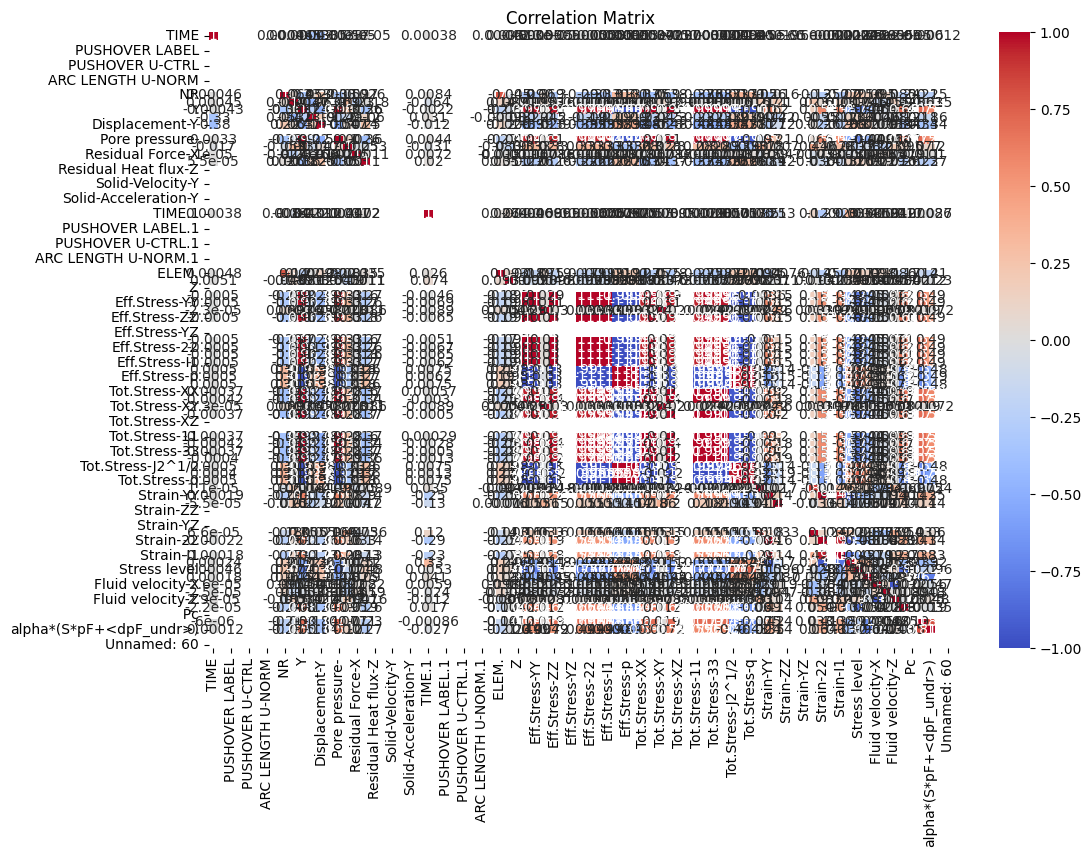

In [4]:
correlation_matrix = combined_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix.png')
plt.show()

<b>Pairwise Scatter Plots:</b> Use pair plots to visualize relationships between variables, particularly those you expect to have an impact on soil subsidence.

In [5]:
sns.pairplot(combined_data, vars=['Displacement-Y', 'Strain-YY', 'Eff.Stress-XY', 'Tot.Stress-YY','Fluid velocity-Y','Solid-Velocity-Y', 'Saturation', 'Pore pressure'])
plt.savefig('Pairwise Scatter Plot.png')
plt.show()

: 

#### <b>Distribution Analysis</b>:

<b>Histograms:</b> Plot histograms of key variables to understand their distributions. This can reveal if the data is skewed, has outliers, or if certain values dominate.

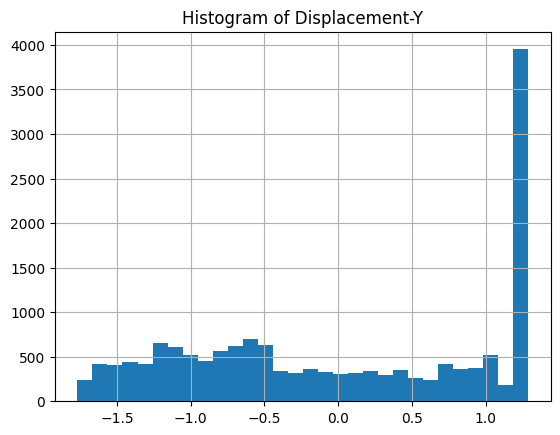

In [26]:
combined_data['Displacement-Y'].hist(bins=30)
plt.title('Histogram of Displacement-Y')
plt.savefig('Histogram of Displacement-Y.png')
plt.show()

<b>Box Plots:</b> Use box plots to detect outliers and understand the spread of data across different variables.

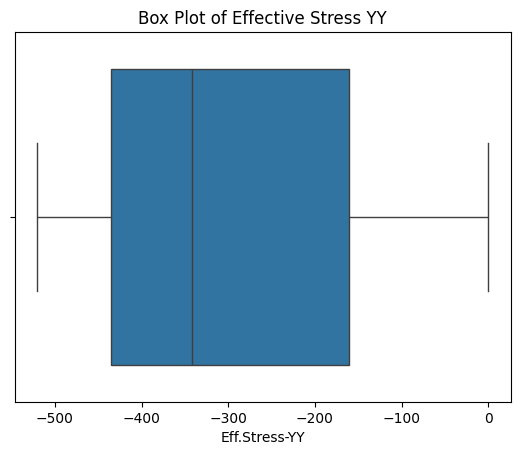

In [27]:
sns.boxplot(x=combined_data['Eff.Stress-YY'])
plt.title('Box Plot of Effective Stress YY')
plt.savefig('Box Plot of Effective Stress YY.png')
plt.show()

#### <b>Spatial Analysis</b>:

<b>Contour Plots:</b> Create contour or heat maps of variables like displacement, pore pressure, or stress across the X-Y plane. This can reveal spatial patterns or anomalies.

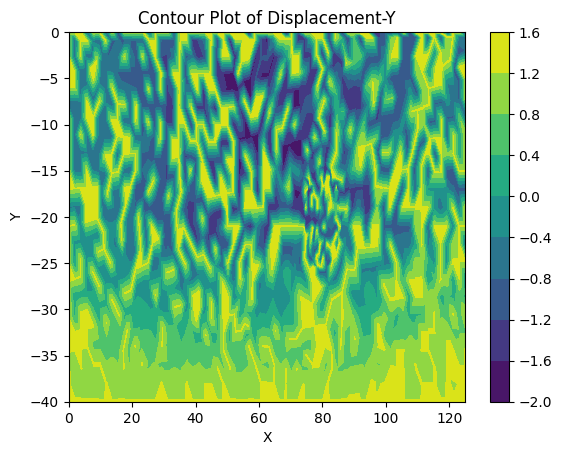

In [28]:
plt.tricontourf(combined_data['X'], combined_data['Y'], combined_data['Displacement-Y'], cmap='viridis')
plt.colorbar()
plt.title('Contour Plot of Displacement-Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Contour Plot of Displacement-Y.png')
plt.show()

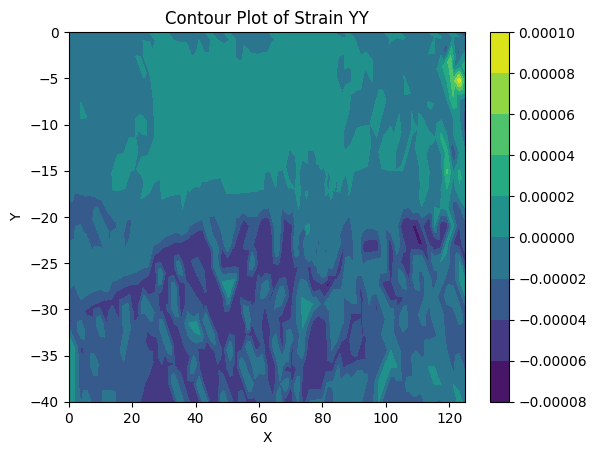

In [29]:
plt.tricontourf(combined_data['X'], combined_data['Y'], combined_data['Strain-YY'], cmap='viridis')
plt.colorbar()
plt.title('Contour Plot of Strain YY')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Contour Plot of Strain YY.png')
plt.show()

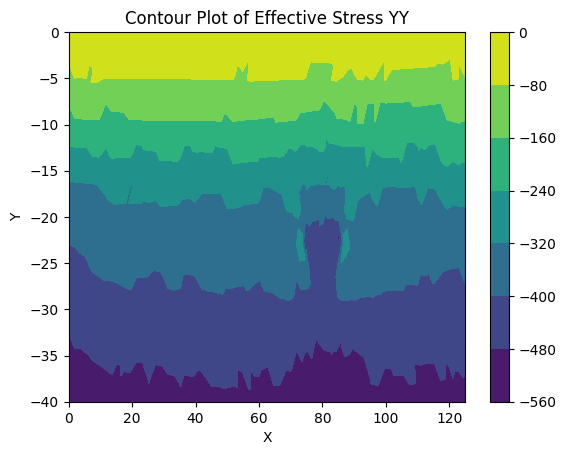

In [30]:
plt.tricontourf(combined_data['X'], combined_data['Y'], combined_data['Eff.Stress-YY'], cmap='viridis')
plt.colorbar()
plt.title('Contour Plot of Effective Stress YY')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Contour Plot of Effective Stress YY.png')
plt.show()

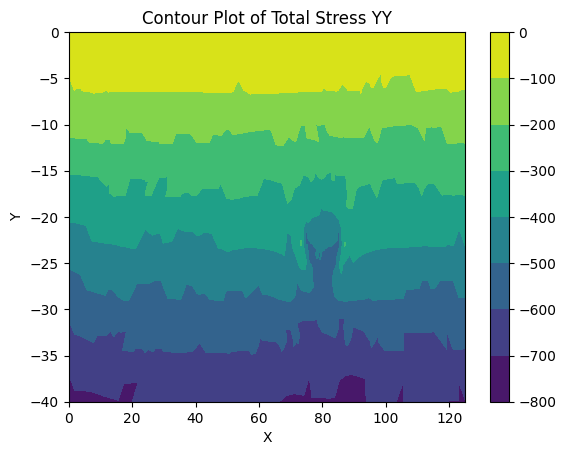

In [31]:
plt.tricontourf(combined_data['X'], combined_data['Y'], combined_data['Tot.Stress-YY'], cmap='viridis')
plt.colorbar()
plt.title('Contour Plot of Total Stress YY')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Contour Plot of Total Stress YY.png')
plt.show()

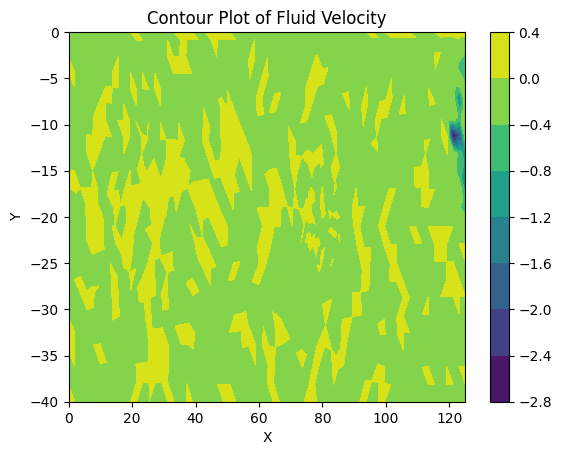

In [32]:
plt.tricontourf(combined_data['X'], combined_data['Y'], combined_data['Fluid velocity-Y'], cmap='viridis')
plt.colorbar()
plt.title('Contour Plot of Fluid Velocity')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Contour Plot of Fluid Velocity.png')
plt.show()

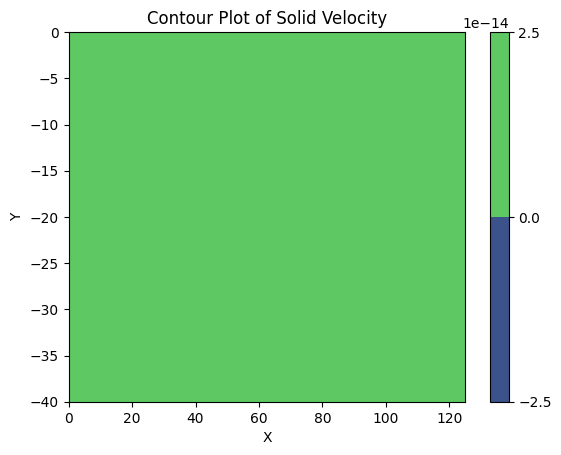

In [72]:
plt.tricontourf(combined_data['X'], combined_data['Y'], combined_data['Solid-Velocity-Y'], cmap='viridis')
plt.colorbar()
plt.title('Contour Plot of Solid Velocity')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Contour Plot of Solid Velocity.png')
plt.show()

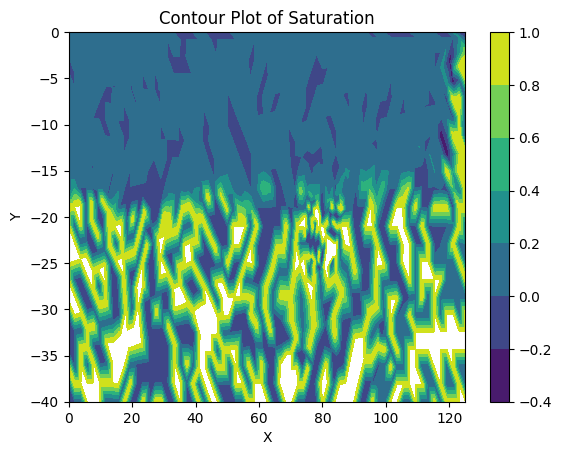

In [33]:
plt.tricontourf(combined_data['X'], combined_data['Y'], combined_data['Saturation'], cmap='viridis')
plt.colorbar()
plt.title('Contour Plot of Saturation')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Contour Plot of Saturation.png')
plt.show()

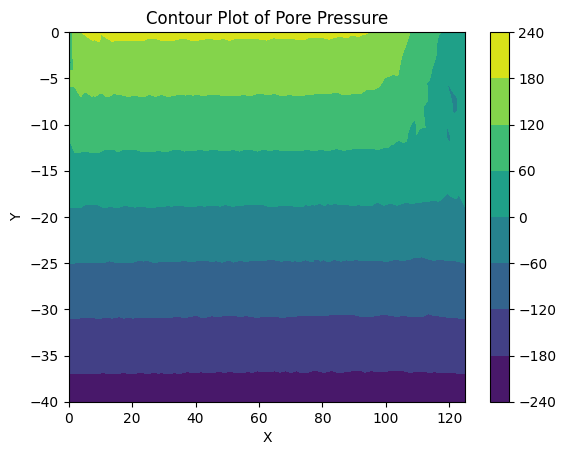

In [34]:
plt.tricontourf(combined_data['X'], combined_data['Y'], combined_data['Pore pressure-'], cmap='viridis')
plt.colorbar()
plt.title('Contour Plot of Pore Pressure')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Contour Plot of Pore Pressure.png')
plt.show()

<b>3D Surface Plots:</b> If 3D data is available (e.g., including Z-dimension), use 3D surface plots to visualize how different variables vary across space.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

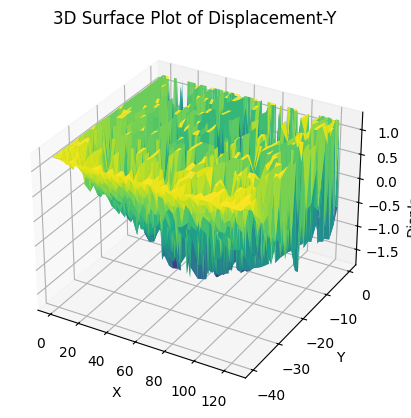

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(combined_data['X'], combined_data['Y'], combined_data['Displacement-Y'], cmap='viridis')
ax.set_title('3D Surface Plot of Displacement-Y')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Displacement-Y')
plt.savefig('3D Surface Plot of Displacement-Y.png')
plt.show()

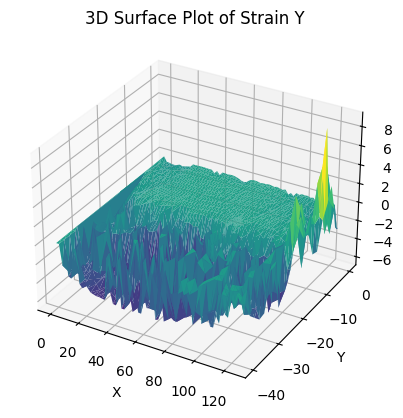

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(combined_data['X'], combined_data['Y'], combined_data['Strain-YY'], cmap='viridis')
ax.set_title('3D Surface Plot of Strain Y')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Displacement-Y')
plt.savefig('3D Surface Plot of Strain Y.png')
plt.show()

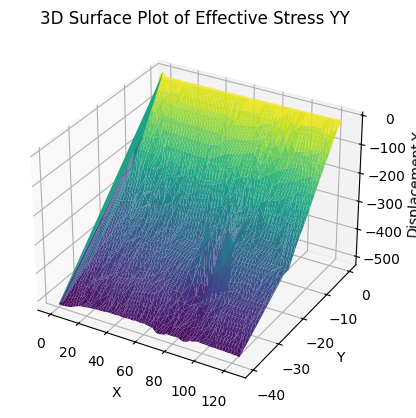

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(combined_data['X'], combined_data['Y'], combined_data['Eff.Stress-YY'], cmap='viridis')
ax.set_title('3D Surface Plot of Effective Stress YY')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Displacement-Y')
plt.savefig('3D Surface Plot of Effective Stress YY.png')
plt.show()

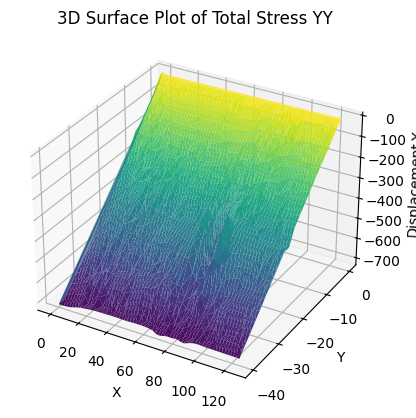

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(combined_data['X'], combined_data['Y'], combined_data['Tot.Stress-YY'], cmap='viridis')
ax.set_title('3D Surface Plot of Total Stress YY')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Displacement-Y')
plt.savefig('3D Surface Plot of Total Stress YY.png')
plt.show()

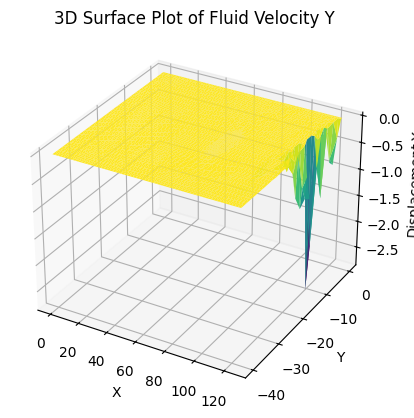

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(combined_data['X'], combined_data['Y'], combined_data['Fluid velocity-Y'], cmap='viridis')
ax.set_title('3D Surface Plot of Fluid Velocity Y')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Displacement-Y')
plt.savefig('3D Surface Plot of Fluid Velocity Y.png')
plt.show()

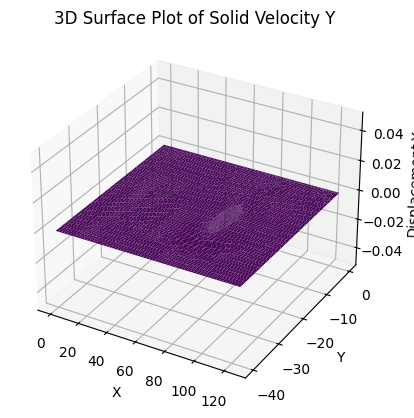

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(combined_data['X'], combined_data['Y'], combined_data['Solid-Velocity-Y'], cmap='viridis')
ax.set_title('3D Surface Plot of Solid Velocity Y')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Displacement-Y')
plt.savefig('3D Surface Plot of Solid Velocity Y.png')
plt.show()

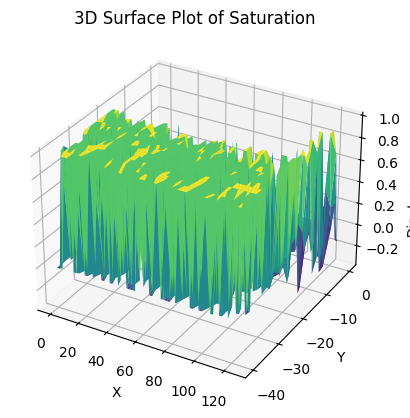

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(combined_data['X'], combined_data['Y'], combined_data['Saturation'], cmap='viridis')
ax.set_title('3D Surface Plot of Saturation')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Displacement-Y')
plt.savefig('3D Surface Plot of Saturation.png')
plt.show()

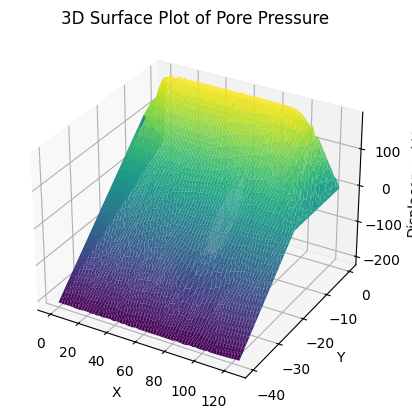

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(combined_data['X'], combined_data['Y'], combined_data['Pore pressure-'], cmap='viridis')
ax.set_title('3D Surface Plot of Pore Pressure')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Displacement-Y')
plt.savefig('3D Surface Plot of Pore Pressure.png')
plt.show()

## Authors:

[Karol Niewitecki](https://www.linkedin.com/in/karol-wilhelm-niewitecki-0385492b7/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01)

Karol Niewitecki is a Master's student in Civil Engineering on Politechnika Krakowska and a Bachelor's student in Electrical Engineering on AGH.